In [13]:
from __future__ import print_function

from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


import flotilla
sns.set(style='ticks', context='paper')

figure_folder = 'figures'
! mkdir $figure_folder

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'

study = flotilla.embark('singlecell_pnm_miso_modalities', flotilla_dir=flotilla_dir)

mkdir: cannot create directory `figures': File exists
2016-07-14 13:01:21	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_miso_modalities/datapackage.json
2016-07-14 13:01:21	Parsing datapackage to create a Study object
2016-07-14 13:02:06 	Initializing Study
2016-07-14 13:02:06 	Initializing Predictor configuration manager for Study
2016-07-14 13:02:06	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-07-14 13:02:06	Added ExtraTreesClassifier to default predictors
2016-07-14 13:02:06	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-07-14 13:02:06	Added ExtraTreesRegressor to default predictors
2016-07-14 13:02:06	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-07-14 13:02:06	Added GradientBoostingClassifier to default predictors
2016-07-14 13:02:06	Predictor GradientB

In [14]:
folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'
csv_folder = '{}/csvs_for_paper/'.format(folder)
bed_folder = '{}/bed'.format(folder)



splicing_feature_folder = '{}/splicing_feature_data'.format(csv_folder)
alternative_feature_folder = '{}/alternative'.format(splicing_feature_folder)
constitutive_feature_folder = '{}/constitutive'.format(splicing_feature_folder)

In [2]:
study.splicing.feature_data.columns

Index([u'gene_type', u'gene_name', u'gencode_transcript',
       u'ensembl_transcript', u'ensembl_gene', u'gencode_gene', u'splice_type',
       u'biomark_neural_panel', u'confident_rbp', u'rbp', u'ribosomal',
       u'ribosomal_subunit', u'synapse', u'transcription_factor',
       u'gerstberger2014_tf', u'gerstberger2014_rbp',
       u'gerstberger2014_rbp_consensus_rna_target',
       u'gerstberger2014_rbp_target_mrna', u'exon2_length', u'mod3',
       u'exon1_5p_splice_site_strength', u'exon3_3p_splice_site_strength',
       u'exon2_5p_splice_site_strength', u'exon2_3p_splice_site_strength',
       u'miRNA_primary_transcript', u'exon2_overlapping_repeats',
       u'exon2_overlapping_repeats_unique', u'exon2_n_overlapping_repeats',
       u'exon2_gc', u'exon2_gc_codon_position1', u'exon2_gc_codon_position2',
       u'exon2_gc_codon_position3', u'reading_frame',
       u'exon3_3p_splice_site_seq', u'exon2_3p_splice_site_seq',
       u'exon1_5p_splice_site_seq', u'exon2_5p_splice_site_s

In [3]:
modalities_conservation = study.supplemental.modalities_tidy.join(study.splicing.feature_data.exon2_phastcons_100way, 
                                                                  on='event_id')
modalities_conservation.head()

,event_id,phenotype,modality,exon2_phastcons_100way
2,chr10:100190328:100190427:-@chr10:100189548:10...,iPSC,bimodal,0.288253
5,chr10:100193697:100193848:-@chr10:100190888:10...,iPSC,bimodal,0.804739
8,chr10:100193740:100193848:-@chr10:100190888:10...,iPSC,included,0.804739
11,chr10:100195392:100195529:-@chr10:100195029:10...,iPSC,uncategorized,0.840517
12,chr10:101507014:101507147:+@chr10:101510126:10...,MN,uncategorized,1.000000


In [6]:
import anchor
modality_to_color = anchor.MODALITY_TO_COLOR.copy()
modality_to_color['constitutive'] = '#262626'
modality_order = ['excluded', 'bimodal', 'included', 'constitutive']
modality_palette = [modality_to_color[m] for m in modality_order]

In [10]:
sns.set(context='paper', style='white')

In [12]:
! bigWigAverageOverBed

bigWigAverageOverBed - Compute average score of big wig over each bed, which may have introns.
usage:
   bigWigAverageOverBed in.bw in.bed out.tab
The output columns are:
   name - name field from bed, which should be unique
   size - size of bed (sum of exon sizes
   covered - # bases within exons covered by bigWig
   sum - sum of values over all bases covered
   mean0 - average over bases with non-covered bases counting as zeroes
   mean - average over just covered bases
Options:
   -bedOut=out.bed - Make output bed that is echo of input bed but with mean column appended
   -sampleAroundCenter=N - Take sample at region N bases wide centered around bed item, rather
                     than the usual sample in the bed item.



In [16]:
! bigWigAverageOverBed /projects/ps-yeolab/genomes/hg19/hg19.100way.phastCons.bw $constitutive_feature_folder/exons.bed \
    $constitutive_feature_folder/exons.hg19.100way.phastCons.txt

processing chromosomes.......................


In [20]:
constitutive_conservation = pd.read_table("{}//exons.hg19.100way.phastCons.txt".format(constitutive_feature_folder), 
                                          header=None, index_col=0)
constitutive_conservation.head()

,1,2,3,4,5
0,,,,,
exon:chr1:10002682-10002840:-,158,158,14.046,0.088899,0.088899
exon:chr1:104070317-104070364:+,47,47,44.020,0.936596,0.936596
exon:chr1:104076361-104076479:+,118,118,92.460,0.783559,0.783559
exon:chr1:10464218-10464336:+,118,118,102.114,0.865373,0.865373
exon:chr1:10468128-10468197:+,69,69,63.276,0.917043,0.917043


In [22]:
constitutive_mean = constitutive_conservation[5]
constitutive_mean.head()

0
exon:chr1:10002682-10002840:-      0.088899
exon:chr1:104070317-104070364:+    0.936596
exon:chr1:104076361-104076479:+    0.783559
exon:chr1:10464218-10464336:+      0.865373
exon:chr1:10468128-10468197:+      0.917043
Name: 5, dtype: float64

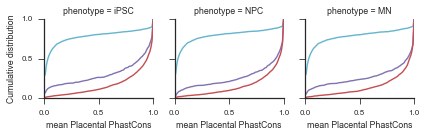

In [35]:
from flotilla.visualize.generic import cdfplot

g = sns.FacetGrid(col='phenotype', hue='modality', size=2, #aspect=.75,
            data=modalities_conservation, hue_order=modality_order, palette=modality_palette, 
            col_order=study.phenotype_order)

g.map(cdfplot, 'exon2_phastcons_100way')
g.set_xlabels('mean Placental PhastCons')
g.set_ylabels('Cumulative distribution')
g.set(xlim=(0, 1), ylim=(0, 1), yticks=(0, 0.5, 1), xticks=(0, 0.5, 1))
g.fig.tight_layout()
g.savefig('{}/conservation_cdf.pdf'.format(folder))

In [28]:
constitutive_df = constitutive_mean.reset_index()
constitutive_df['modality'] = 'constitutive'
constitutive_df = constitutive_df.rename(columns={5:'exon2_phastcons_100way', 0:'event_id'})
constitutive_df.head()

,event_id,exon2_phastcons_100way,modality
0,exon:chr1:10002682-10002840:-,0.088899,constitutive
1,exon:chr1:104070317-104070364:+,0.936596,constitutive
2,exon:chr1:104076361-104076479:+,0.783559,constitutive
3,exon:chr1:10464218-10464336:+,0.865373,constitutive
4,exon:chr1:10468128-10468197:+,0.917043,constitutive


In [31]:
modalities_conservation_constitutive = modalities_conservation.copy()

for phenotype in study.phenotype_order:
    constitutive_df_phenotype = constitutive_df.copy()
    constitutive_df_phenotype['phenotype'] = phenotype
    modalities_conservation_constitutive = pd.concat([modalities_conservation_constitutive, constitutive_df_phenotype])
print(modalities_conservation_constitutive.shape)
modalities_conservation_constitutive.tail()

(60147, 4)


,event_id,exon2_phastcons_100way,modality,phenotype
5888,exon:chrX:80532483-80532668:+,0.958968,constitutive,MN
5889,exon:chrX:80533830-80533910:+,0.951775,constitutive,MN
5890,exon:chrX:99887482-99887565:-,0.875627,constitutive,MN
5891,exon:chrX:99890175-99890249:-,0.914649,constitutive,MN
5892,exon:chrX:99890555-99890743:-,0.880931,constitutive,MN


In [33]:
sns.set(style='ticks', context='paper')


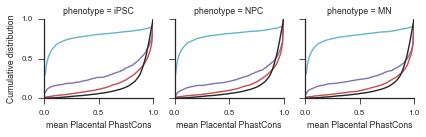

In [34]:
from flotilla.visualize.generic import cdfplot

g = sns.FacetGrid(col='phenotype', hue='modality', size=2, #aspect=.75,
            data=modalities_conservation_constitutive, hue_order=modality_order, palette=modality_palette, 
            col_order=study.phenotype_order)

g.map(cdfplot, 'exon2_phastcons_100way')
g.set_xlabels('mean Placental PhastCons')
g.set_ylabels('Cumulative distribution')
g.set(xlim=(0, 1), ylim=(0, 1), yticks=(0, 0.5, 1), xticks=(0, 0.5, 1))
g.fig.tight_layout()
g.savefig('{}/conservation_cdf_constitutive.pdf'.format(folder))